In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('tianchi/used_car_train_20200313.csv', sep='\s')
test_data = pd.read_csv('tianchi/used_car_testB_20200421.csv', sep='\s')
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [4]:
train_data['notRepairedDamage'] = train_data.notRepairedDamage.replace('-', np.nan)

In [5]:
train_data.notRepairedDamage.unique()

array(['0.0', nan, '1.0'], dtype=object)

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleID,150000.0,7.499950e+04,43301.414527,0.000000e+00,3.749975e+04,7.499950e+04,1.124992e+05,1.499990e+05
name,150000.0,6.834917e+04,61103.875095,0.000000e+00,1.115600e+04,5.163800e+04,1.188412e+05,1.968120e+05
regDate,150000.0,2.003417e+07,53649.879255,1.991000e+07,1.999091e+07,2.003091e+07,2.007111e+07,2.015121e+07
model,149999.0,4.712902e+01,49.536040,0.000000e+00,1.000000e+01,3.000000e+01,6.600000e+01,2.470000e+02
brand,150000.0,8.052733e+00,7.864956,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,145494.0,1.792369e+00,1.760640,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,141320.0,3.758421e-01,0.548677,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,144019.0,2.249425e-01,0.417546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,150000.0,1.193165e+02,177.168419,0.000000e+00,7.500000e+01,1.100000e+02,1.500000e+02,1.931200e+04
kilometer,150000.0,1.259716e+01,3.919576,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


In [7]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [8]:
train_data.shape

(150000, 31)

In [9]:
test_data.shape

(50000, 30)

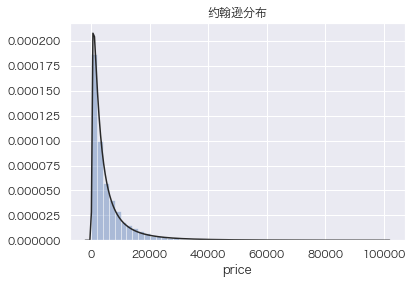

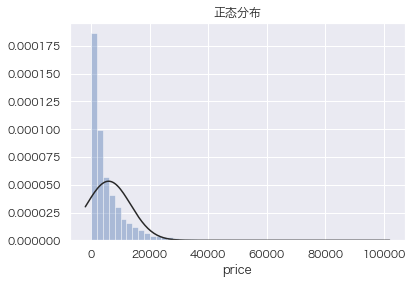

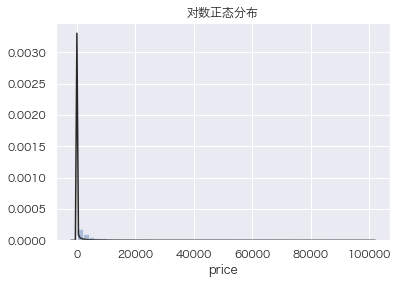

In [10]:
import scipy.stats as st
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'/System/Library/Fonts/Hiragino Sans GB.ttc',size=14)
sns.set(font=myfont.get_name())

y = train_data.price
plt.figure(1)
plt.title('约翰逊分布')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('正态分布')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('对数正态分布')
sns.distplot(y, kde=False, fit=st.lognorm)

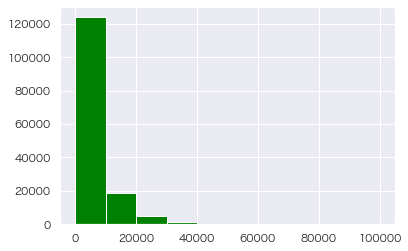

In [11]:
##预测值不服从正态分布,最好进行转换

#查看预测值的具体频数
plt.hist(train_data.price, orientation='vertical', histtype='bar', color='green')
plt.show()

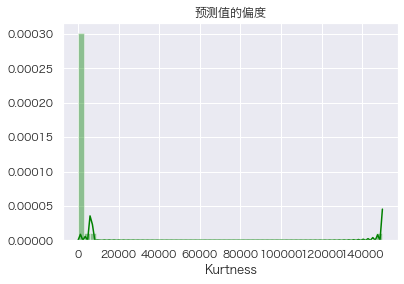

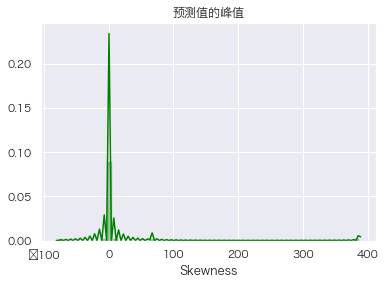

In [12]:
plt.figure(1)
plt.title('预测值的偏度')
sns.distplot(train_data.kurt(), color='green', axlabel='Kurtness')
plt.figure(2)
plt.title('预测值的峰值')
sns.distplot(train_data.skew(), color='green', axlabel='Skewness')


In [13]:
train_data.skew()

SaleID               6.017846e-17
name                 5.576058e-01
regDate              2.849508e-02
model                1.484388e+00
brand                1.150760e+00
bodyType             9.915299e-01
fuelType             1.595486e+00
gearbox              1.317514e+00
power                6.586318e+01
kilometer           -1.525921e+00
notRepairedDamage    2.430640e+00
regionCode           6.888812e-01
seller               3.872983e+02
offerType            0.000000e+00
creatDate           -7.901331e+01
price                3.346487e+00
v_0                 -1.316712e+00
v_1                  3.594543e-01
v_2                  4.842556e+00
v_3                  1.062920e-01
v_4                  3.679890e-01
v_5                 -4.737094e+00
v_6                  3.680730e-01
v_7                  5.130233e+00
v_8                  2.046133e-01
v_9                  4.195007e-01
v_10                 2.522046e-02
v_11                 3.029146e+00
v_12                 3.653576e-01
v_13          

In [14]:
##将定性数据和定量数据分开
number_feature = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']

category_feature = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']

In [15]:

def category_num(data, cols):
    res = {}
    for col in cols:
        number = data[col].nunique()
        res[col] = number
    return res

res = category_num(train_data, category_feature)

In [16]:
def choose_sparse(category_list, category_num_dict, value=100):
    """
    剔除过于稀疏的特征
    """
    result_list = []
    for key in category_num_dict.keys():
        if category_num_dict[key] <= value:
            result_list.append(key)
    return result_list


category_list = choose_sparse(category_feature, res)

In [17]:
category_list

['brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'seller',
 'offerType']

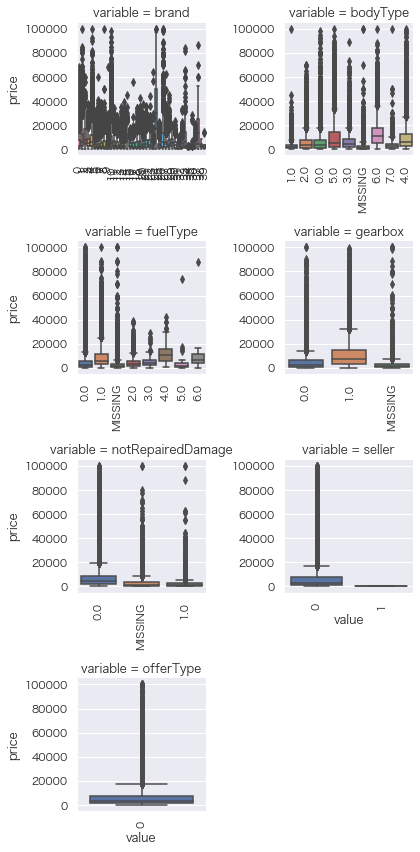

In [18]:
for c in category_list:
    train_data[c] = train_data[c].astype('category')
    if train_data[c].isnull().any():
        train_data[c] = train_data[c].cat.add_categories(['MISSING'])
        train_data[c] = train_data[c].fillna('MISSING')
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

    
f = pd.melt(train_data, id_vars=['price'], value_vars=category_list)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'price')

In [19]:
train_data.drop(['offerType', 'seller'], axis=1, inplace=True)
test_data.drop(['offerType', 'seller'], axis=1, inplace=True)

In [20]:
category_list.remove('offerType')

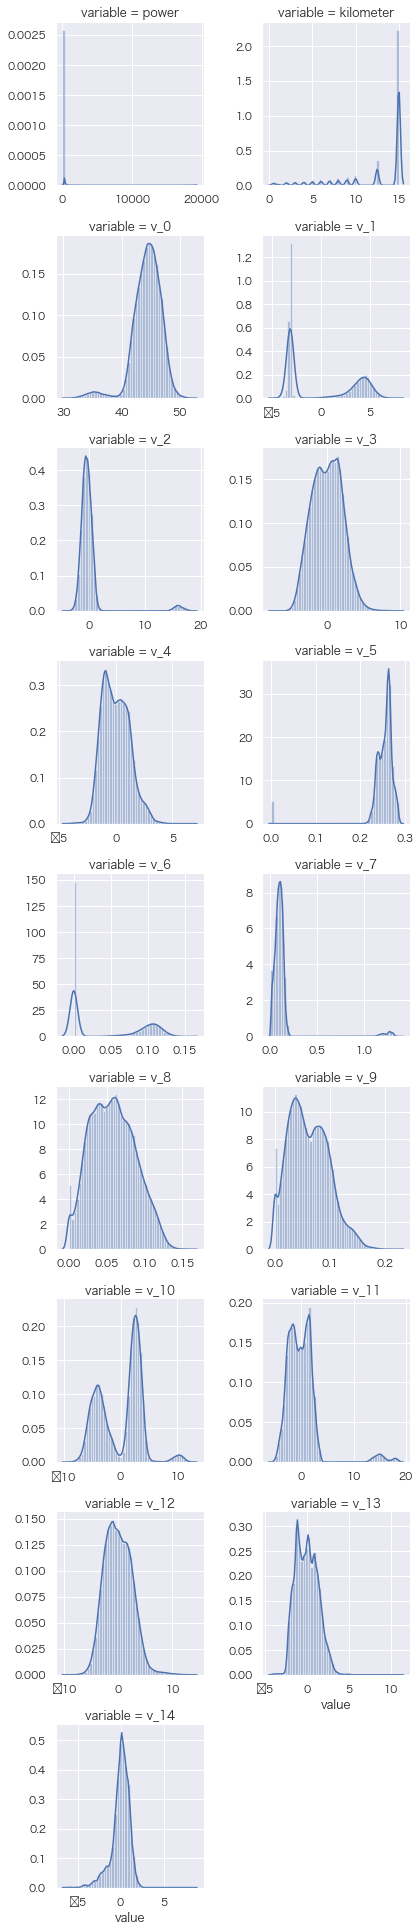

In [21]:
f = pd.melt(train_data, value_vars=number_feature)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [22]:
train_data.power.describe()

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

In [23]:
train_data.loc[train_data.power > 600, 'power'] = 600

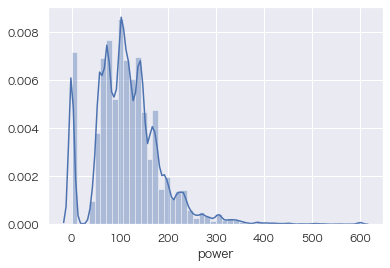

In [24]:
sns.distplot(train_data.power)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

RFR = DecisionTreeRegressor()

train_X = train_data[['brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']]
train_y = train_data[['price']]
train_X.replace('MISSING', .0, inplace=True)

RFR.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
bins = [i for i in range(0, 700, 50)]
train_data['train'] = 1
test_data['train'] = 0
data = pd.concat([train_data, test_data], ignore_index=True)
power_bins = pd.cut(data.power, bins=bins, right=False, include_lowest=True, labels=False)
data['power_bins'] = power_bins

In [27]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,power_bins
0,0,736,20040402,30.0,6,1,0,0,60,12.5,...,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1,1.0
1,1,2262,20030301,40.0,1,2,0,0,0,15.0,...,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1,0.0
2,2,14874,20040403,115.0,15,1,0,0,163,12.5,...,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1,3.0
3,3,71865,19960908,109.0,10,0,0,1,193,15.0,...,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1,3.0
4,4,111080,20120103,110.0,5,1,0,0,68,5.0,...,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1,1.0


In [28]:
[i for i in range(0, 0, 50)]

[]

In [29]:
pd.cut(data.power, bins=bins, right=False, include_lowest=True, labels=False).unique()

array([ 1.,  0.,  3.,  2.,  4.,  6., 10.,  7.,  5., 12.,  8., 11.,  9.,
       nan])

In [30]:
power_bins

0         1.0
1         0.0
2         3.0
3         3.0
4         1.0
         ... 
199995    3.0
199996    3.0
199997    2.0
199998    3.0
199999    0.0
Name: power, Length: 200000, dtype: float64

In [31]:
data.kilometer.describe()

count    200000.000000
mean         12.597435
std           3.917803
min           0.500000
25%          12.500000
50%          15.000000
75%          15.000000
max          15.000000
Name: kilometer, dtype: float64

In [32]:
data[['power_bins', 'power']].head()

,power_bins,power
0,1.0,60
1,0.0,0
2,3.0,163
3,3.0,193
4,1.0,68


In [33]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data['power'] = min_max.fit_transform(data[['power']])

In [34]:
data[['power']].head()

,power
0,0.003123
1,0.000000
2,0.008485
3,0.010046
4,0.003540


In [35]:
category_list.append('power_bins')

In [36]:
data.kilometer.nunique()

13

In [37]:
category_list.append('kilometer')

In [38]:
data = pd.get_dummies(data, columns=category_list)

KeyError: "['seller'] not in index"

In [39]:
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train',
       'power_bins'],
      dtype='object')

In [40]:
data[['creatDate']].head()

,creatDate
0,20160404
1,20160309
2,20160402
3,20160312
4,20160313


In [41]:
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [42]:
data[data['used_time'].isnull()][['regDate', 'creatDate', 'used_time']]

,regDate,creatDate,used_time
14,20070009,20160402,NaN
20,19970004,20160311,NaN
22,19970008,20160326,NaN
42,19960009,20160328,NaN
51,20020006,20160325,NaN
...,...,...,...
199916,20150008,20160324,NaN
199925,20020003,20160316,NaN
199935,19960007,20160307,NaN
199938,20080004,20160319,NaN


In [43]:
from datetime import datetime
##
def transform_err_time(x):
    if not isinstance(x, int):
        x = int(x)
    try:
        date = datetime.strptime(str(x), '%Y%m%d')
    except:
        x = x + 100
        date = datetime.strptime(str(x), '%Y%m%d')
    return date
data.loc[data['used_time'].isnull(), 'used_time'] = (data[data['used_time'].isnull()]['creatDate'].apply(transform_err_time) - data[data['used_time'].isnull()]['regDate'].apply(transform_err_time)).dt.days

In [44]:
data.used_time.isnull().sum()

0

In [45]:
data.used_time.describe()

count    200000.000000
mean       4541.903490
std        1966.870591
min          51.000000
25%        3056.000000
50%        4567.000000
75%        6025.000000
max        9224.000000
Name: used_time, dtype: float64

In [46]:
test_id = test_data.SaleID

In [47]:
number_feature

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             200000 non-null  int64  
 1   name               200000 non-null  int64  
 2   regDate            200000 non-null  int64  
 3   model              199999 non-null  float64
 4   brand              200000 non-null  int64  
 5   bodyType           198496 non-null  object 
 6   fuelType           197076 non-null  object 
 7   gearbox            198032 non-null  object 
 8   power              200000 non-null  float64
 9   kilometer          200000 non-null  float64
 10  notRepairedDamage  200000 non-null  object 
 11  regionCode         200000 non-null  int64  
 12  creatDate          200000 non-null  int64  
 13  price              150000 non-null  float64
 14  v_0                200000 non-null  float64
 15  v_1                200000 non-null  float64
 16  v_

In [49]:
data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              1504
fuelType              2924
gearbox               1968
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
train                    0
power_bins              47
used_time                0
dtype: int64

In [ ]:
data.head()

In [ ]:
data['model']

In [ ]:
train_data.info()

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.notRepairedDamage.unique()

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
data.info()

In [ ]:
list(data.columns)

In [ ]:
data.isnull().sum()

In [52]:
data.notRepairedDamage = data.notRepairedDamage.replace('-', np.nan)

In [53]:
data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              1504
fuelType              2924
gearbox               1968
power                    0
kilometer                0
notRepairedDamage     8069
regionCode               0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
train                    0
power_bins              47
used_time                0
dtype: int64

In [54]:
data.replace('MISSING', np.nan, inplace=True)

In [55]:
data.model.fillna(data.model.mode()[0], inplace=True)

In [61]:
data.power.describe()

count    200000.00000
mean        116.77520
std          70.17691
min           0.00000
25%          75.00000
50%         110.00000
75%         150.00000
max         600.00000
Name: power, dtype: float64

In [60]:
data.loc[data.power > 600, 'power'] = 600

In [66]:
data.power = min_max.fit_transform(data[['power']])

In [62]:
# data.power = min_max.inverse_transform(data[['power']])
bins = [i for i in range(0, 700, 50)]
power_bins = pd.cut(data['power'], bins=bins, right=False, labels=False)
data['power_bins'] = power_bins

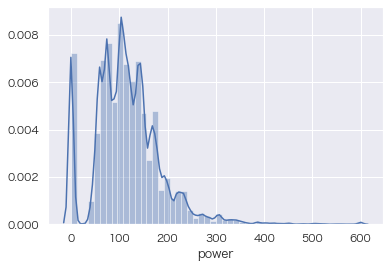

In [63]:
sns.distplot(data.power)

In [64]:
power_bins

0         1
1         0
2         3
3         3
4         1
         ..
199995    3
199996    3
199997    2
199998    3
199999    0
Name: power, Length: 200000, dtype: int64

In [65]:
data.power

0          60
1           0
2         163
3         193
4          68
         ... 
199995    150
199996    179
199997    147
199998    176
199999      0
Name: power, Length: 200000, dtype: int64

In [58]:
news_data = pd.concat([train_data, test_data], ignore_index=True)
data['power'] = news_data['power']

In [67]:
data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType              6010
fuelType             11604
gearbox               7949
power                    0
kilometer                0
notRepairedDamage    32393
regionCode               0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
train                    0
power_bins               0
used_time                0
dtype: int64

In [68]:
data[data['bodyType'].isnull()]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,power_bins,used_time
14,14,1896,20070009,1.0,0,NaN,NaN,0.0,0.000000,15.0,...,0.040885,0.020187,2.550859,18.192443,5.145351,-0.836169,0.645098,1,0,3371.0
125,125,1608,20000505,46.0,6,NaN,NaN,0.0,0.191667,15.0,...,0.044010,0.012337,3.690847,17.954498,4.295464,-0.531725,-0.278035,1,2,5808.0
154,154,22859,20000008,19.0,14,NaN,0.0,NaN,0.000000,15.0,...,0.018110,0.023279,11.301453,16.004557,1.426345,-1.312529,-1.238867,1,0,5922.0
188,188,42796,20010203,49.0,1,NaN,1.0,0.0,0.000000,0.5,...,0.081382,0.000000,9.617107,14.106252,7.091584,-2.048858,-0.535474,1,0,5523.0
199,199,163397,20050009,69.0,6,NaN,NaN,NaN,0.000000,15.0,...,0.060487,0.034798,10.419571,15.048264,4.460700,0.237442,0.451031,1,0,4092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199859,249859,175053,20001205,16.0,13,NaN,0.0,0.0,0.000000,15.0,...,0.058820,0.043550,10.664866,15.312747,3.424088,1.012900,-0.355691,0,0,5586.0
199865,249865,2495,20000011,19.0,25,NaN,NaN,NaN,0.100000,12.5,...,0.019952,0.005822,5.415000,18.108796,2.392167,-1.416017,-1.089548,0,1,5909.0
199903,249903,1383,20000705,73.0,14,NaN,0.0,0.0,0.168333,15.0,...,0.028680,0.046853,5.392919,18.165453,2.254181,0.711773,-0.129842,0,2,5748.0
199916,249916,181676,20150008,167.0,24,NaN,NaN,1.0,0.716667,0.5,...,0.053347,0.023542,9.864790,14.424173,6.661034,-2.603120,-2.430972,0,8,441.0


In [69]:
def fill_mode(data, col):
    data[col] = data[col].fillna(data[col].mode()[0])
    return data

cols_isnull = ['bodyType', 'fuelType']

for col in cols_isnull:
    data = fill_mode(data, col)

In [70]:
data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType                 0
fuelType                 0
gearbox               7949
power                    0
kilometer                0
notRepairedDamage    32393
regionCode               0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
train                    0
power_bins               0
used_time                0
dtype: int64

In [71]:
data.notRepairedDamage = data.notRepairedDamage.fillna(2.0)

In [72]:
data.gearbox = data.gearbox.fillna(2.0)

In [78]:
data = pd.get_dummies(data, columns=category_list)

In [77]:
category_list.remove('seller')

In [81]:
train_features = data.drop(['SaleID', 'name', 'regDate', 'model', 'regionCode', 'creatDate'], axis=1)

In [79]:
data.isnull().sum()

SaleID            0
name              0
regDate           0
model             0
power             0
                 ..
kilometer_8.0     0
kilometer_9.0     0
kilometer_10.0    0
kilometer_12.5    0
kilometer_15.0    0
Length: 112, dtype: int64

In [82]:
train_X = train_features[data['train'] == 1]

In [83]:
train_y = data[data['train'] == 1]['price']

In [84]:
train_y = np.log(train_y + 1)

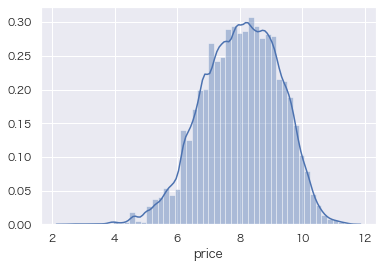

In [85]:
sns.distplot(train_y)

In [86]:
from sklearn.linear_model import Lasso,Ridge,LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = [Lasso(),
         Ridge(),
         LogisticRegression(),
         LinearRegression(),
         RandomForestRegressor(),
         AdaBoostRegressor(),
#          SVR(),
         GradientBoostingRegressor()]

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y, verbose=0, cv=10, scoring=make_scorer(mean_absolute_error))
    
    result[model_name] = scores
    
    print(model_name + ' is finished')

Lasso is finished
Ridge is finished
LogisticRegression is finished
LinearRegression is finished
RandomForestRegressor is finished
AdaBoostRegressor is finished
GradientBoostingRegressor is finished


In [89]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1,11)]
result

,Lasso,Ridge,LogisticRegression,LinearRegression,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
cv1,0.454222,0.196021,NaN,0.190374,0.000091,0.090017,0.005352
cv2,0.458230,0.194922,NaN,0.189239,0.000089,0.088154,0.005386
cv3,0.455642,0.195704,NaN,0.190033,0.000090,0.078790,0.005467
cv4,0.458327,0.197265,NaN,0.191343,0.000085,0.085748,0.005366
cv5,0.460498,0.199817,NaN,0.193880,0.000088,0.088912,0.005302
cv6,0.457640,0.195323,NaN,0.189862,0.000096,0.088651,0.005254
cv7,0.450090,0.194639,NaN,0.188504,0.000089,0.081264,0.005402
cv8,0.451323,0.193835,NaN,0.188372,0.000088,0.086615,0.005344
cv9,0.457854,0.197829,NaN,0.191666,0.000093,0.070715,0.005404
cv10,0.452506,0.197778,NaN,0.192016,0.000089,0.090865,0.005401


In [94]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, params, error_score=0.)
    grid.fit(X, y)
    ##获取性能指标
    print('best accuracy:{}'.format(grid.best_score_))
    ##最佳参数
    print('best parameters:{}'.format(grid.best_params_))
        # 拟合的平均时间(秒)
    print('average time to fit (s): {}'.format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    ## 预测的平均时间
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [97]:
RFR = RandomForestRegressor(n_jobs=1)
params = {'n_estimators': [i for i in range(100, 400, 100)],
         'max_depth': [i for i in range(60, 110, 10)],
         'max_features': ['auto', 'log2']}

get_best_model_and_accuracy(RFR, params=params, X=train_X, y=train_y)

KeyboardInterrupt: 

In [99]:
!pip install lightgbm

     |████████████████████████████████| 679 kB 17 kB/s eta 0:00:01


In [100]:
from sklearn import linear_model
from xgboost import XGBRegressor
import lightgbm as lgb
def build_model_lr(train_x, train_y):
    reg_model = linear_model.LinearRegression()
    reg_model.fit(train_x, train_y)
    return reg_model

def build_model_ridge(train_x, train_y):
    reg_model = linear_model.Ridge(alpha=0.8)
    reg_model.fit(train_x, train_y)
    return reg_model

def build_model_lasso(train_x, train_y):
    reg_model = linear_model.Lasso(alpha=0.8)
    reg_model.fit(train_x, train_y)
    return reg_model

def build_model_gbdt(train_x, train_y):
    reg_model = GradientBoostingRegressor(loss='ls', subsample=0.85, max_depth=5, n_estimators=100)
    param_grid = {
        'learning_rate': [0.05, 0.08, 0.1, 0.2]
    }
    gbdt = GridSearchCV(reg_model, param_grid, cv=3)
    gbdt.fit(train_x, train_y)
    print(gbdt.best_params_)
    return gbdt

def build_model_xgb(train_x, train_y):
    reg_model = XGBRegressor(n_estimators=120, learning_rate=0.08, gamma=0, subsample=0.8, colsample_bytree=0.9, max_depth=5)
    reg_model.fit(train_x, train_y)
    return reg_model


def build_model_lgb(train_x,train_y):
    estimator = lgb.LGBMRegressor(num_leaves=63,n_estimators = 100)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(train_x, train_y)
    print(gbm.best_params_)
    return gbm
    
    

In [113]:
from sklearn.model_selection import StratifiedKFold
xgr = XGBRegressor(n_estimators=120, learning_rate=0.1, subsample=0.8, colsample_bytree=0.9, max_depth=7)

scores_train = []
scores = []

sk = KFold(n_splits=5, shuffle=True, random_state=0)
for train_ind, val_ind in sk.split(train_X, train_y):
    stack_train_x = train_X.iloc[train_ind].values
    stack_train_y = train_y.iloc[train_ind].values
    val_X = train_X.iloc[val_ind].values
    val_y = train_y.iloc[val_ind].values
    
    xgr.fit(stack_train_x, stack_train_y)
    pred_train_xgb = xgr.predict(stack_train_x)
    pred_xgb = xgr.predict(val_X)
    
    score_train = mean_absolute_error(stack_train_y, pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)

print('Train mae:',np.mean(scores_train))
print('Val mae',np.mean(scores))
    

Train mae: 0.003334146381651247
Val mae 0.0036359166017427224


In [114]:

print('Train mae:',np.mean(scores_train))
print('Val mae',np.mean(scores))

Train mae: 0.0033256011037367714
Val mae 0.0036359166017427224


In [125]:
from sklearn.model_selection import train_test_split
models = [build_model_gbdt, build_model_lasso, build_model_lgb, build_model_lr, build_model_ridge, build_model_xgb]
__train_x = train_X.drop(['price'], axis=1)
split_train_x, split_val_x, split_train_y, split_val_y = train_test_split(__train_x, train_y, test_size=0.3)
# for model in models:

print('predict lr')
model_lr = build_model_lr(split_train_x, split_train_y)
val_lr = model_lr.predict(split_val_x)
sub_lr = model_lr.predict(sub_test)


print('predict ridge')
model_ridge = build_model_ridge(split_train_x, split_train_y)
val_ridge = model_ridge.predict(split_val_x)
sub_ridge = model_ridge.predict(sub_test)

print('predict lasso')
model_lasso = build_model_lasso(split_train_x, split_train_y)
val_lasoo = model_lasso.predict(split_val_x)
sub_lasoo = model_lasso.predict(sub_test)

print('predict gbdt')
model_gbdt = build_model_gbdt(split_train_x, split_train_y)
val_gbdt = model_gbdt.predict(split_val_x)
sub_gbdt = model_gbdt.predict(sub_test)

predict lr
predict ridge
predict lasso
predict gbdt
{'learning_rate': 0.2}


In [126]:
print('predict XGB...')
model_xgb = build_model_xgb(split_train_x,split_train_y)
val_xgb = model_xgb.predict(split_val_x)
subA_xgb = model_xgb.predict(sub_test)

print('predict lgb...')
model_lgb = build_model_lgb(split_train_x,split_train_y)
val_lgb = model_lgb.predict(split_val_x)
subA_lgb = model_lgb.predict(sub_test)

predict XGB...
predict lgb...
{'learning_rate': 0.1}


In [174]:
##stacking 第一层

train_lgb_pred = model_lgb.predict(split_train_x)
train_xgb_pred = model_xgb.predict(split_train_x)
train_gbdt_pred = model_gbdt.predict(split_train_x)

Strack_x_train = pd.DataFrame()
Strack_x_train['lgb'] = train_lgb_pred
Strack_x_train['xgb'] = train_xgb_pred
Strack_x_train['gbdt'] = train_gbdt_pred

Strack_x_val = pd.DataFrame()
Strack_x_val['lgb'] = val_lgb
Strack_x_val['xgb'] = val_xgb
Strack_x_val['gbdt'] = val_gbdt

Strack_x_test = pd.DataFrame()
Strack_x_test['gbdt'] = sub_gbdt
Strack_x_test['xgb'] = subA_xgb
Strack_x_test['lgb'] = subA_lgb



In [128]:
Strack_x_train.head()

,lgb,xgb,gbdt
0,6.521484,6.540241,6.552817
1,8.060145,7.995869,8.123347
2,8.945082,8.900962,8.875066
3,7.060217,7.095008,7.077681
4,9.600259,9.577357,9.610245


In [130]:
###第二层
model_lr_stacking = build_model_lr(Strack_x_train, split_train_y)

##训练集
train_pre_stacking = model_lr_stacking.predict(Strack_x_train)
print('MAE of Stacking-LR:',mean_absolute_error(split_train_y,train_pre_stacking))

##验证集
val_pre_stacking = model_lr_stacking.predict(Strack_x_val)
print('MAE of Stacking-LR:', mean_absolute_error(split_val_y, val_pre_stacking))

##预测
print('开始预测...')
sub_stacking = model_lr_stacking.predict(Strack_x_test)





MAE of Stacking-LR: 0.12642452375076504
MAE of Stacking-LR: 0.1399859839373071
开始预测...


In [132]:
sub_stacking[:10]

array([7.22935076, 7.50926961, 8.93879782, 6.97791117, 7.57417335,
       7.09825133, 6.05055721, 8.05373636, 9.41225506, 6.46737932])

In [149]:
res = np.power(np.e, sub_stacking) - 1

In [151]:
res.min()

13.669524563974992

In [142]:
sub_stacking.dtype

dtype('float64')

In [148]:
np.power(res, np.e) - 1

array([ 2200214.0470415 ,  2916823.58755821, 10616640.33815452, ...,
        8162797.43466154,  7505484.40887422,  6551454.14911588])

In [152]:
sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = res
sub.to_csv('./stacking_lr_lgb.csv', index=0)

In [154]:
sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = np.around(res)
sub.to_csv('./stacking_lr_lgb_int.csv', index=0)

In [153]:
np.around(res)

array([1378., 1824., 7621., ..., 5581., 5064., 4336.])

In [180]:
# val_lr_stack = model_lr_stacking.predict(split_val_x)

train_lr_pred = model_lr.predict(split_train_x)
train_ridge_pred = model_ridge.predict(split_train_x)
train_lasso_pred = model_lasso.predict(split_train_x)
# train_lr_stack_pred = model_lr_stacking.predict(split_train_x)

Strack_x_train['lr'] = train_lr_pred
Strack_x_train['ridge'] = train_ridge_pred
Strack_x_train['lasso'] = train_lasso_pred
# Strack_x_train['lr_stack'] = train_lr_stack_pred


Strack_x_val['lr'] = val_lr
Strack_x_val['ridge'] = val_ridge
Strack_x_val['lasso'] = val_lasoo
# Strack_x_val['lr_stack'] = val_pre_stacking


Strack_x_test['lr'] = sub_lr
Strack_x_test['ridge'] = sub_ridge
Strack_x_test['lasso'] = sub_lasoo
# Strack_x_test['lr_stack'] = sub_stacking

In [186]:
###第二层
model_lr_stacking = build_model_lr(Strack_x_train, split_train_y)

##训练集
train_pre_stacking = model_lr_stacking.predict(Strack_x_train)
print('MAE of Stacking-LR:',mean_absolute_error(split_train_y,train_pre_stacking))

##验证集
val_pre_stacking = model_lr_stacking.predict(Strack_x_val)
print('MAE of Stacking-LR:', mean_absolute_error(split_val_y, val_pre_stacking))

##预测
print('开始预测...')
sub_stacking = model_lr_stacking.predict(Strack_x_test)


MAE of Stacking-LR: 0.12638891212129108
MAE of Stacking-LR: 0.13997291460533415
开始预测...


In [189]:
res = np.power(np.e, sub_stacking) - 1
sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = res
sub.to_csv('./more_model_submission.csv', index=0)

res = np.power(np.e, sub_stacking)
sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = res
sub.to_csv('./more_model_submission_not_one.csv', index=0)

In [188]:
res.min()

13.26011454747705

In [187]:
res = np.power(np.e, sub_stacking) - 1

In [179]:
res.min()

13.669524563974992

In [185]:
Strack_x_test.head()

,gbdt,xgb,lgb,ridge,lasso
0,7.195993,7.132394,7.182726,7.086077,7.330212
1,7.493521,7.506797,7.551460,7.433725,6.749471
2,8.951610,8.943484,8.908882,9.170130,8.939195
3,7.017243,7.120758,7.080776,7.079034,7.667722
4,7.564777,7.574150,7.602121,7.572189,7.877208


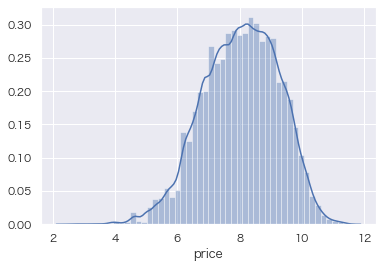

In [173]:
sns.distplot(split_train_y)

In [183]:
Strack_x_test.drop(['lr'], axis=1, inplace=True)
Strack_x_train.drop(['lr'], axis=1, inplace=True)
Strack_x_val.drop(['lr'], axis=1, inplace=True)